In [1]:
!pip install soundata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 27.8 MB/s eta 0:00:00
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64900 sha256=ca377c51eff4ecf7db8f4a2c7d71ea92f23b2c20611ed13eb6fe04a1bc654619
  Stored in directory: 

In [ ]:
!pip install soundata

In [8]:
!pip install numpy==1.26.0

In [1]:
import soundata
import numpy as np
dataset = soundata.initialize('urbansound8k')
dataset.download()


5.61GB [06:24, 15.6MB/s]                            
1.15MB [00:04, 299kB/s]                            


In [2]:
dataset.validate()

100%|██████████| 8732/8732 [01:02<00:00, 140.03it/s]


({'metadata': {}, 'clips': {}}, {'metadata': {}, 'clips': {}})

In [3]:
!pwd

/content


In [6]:
!ls /root/sound_datasets/urbansound8k

audio		      metadata		       UrbanSound8K.tar.gz
FREESOUNDCREDITS.txt  UrbanSound8K_README.txt


In [10]:
!ls /root/sound_datasets/urbansound8k/audio/fold2/4201-3-3-0.wav

/root/sound_datasets/urbansound8k/audio/fold2/4201-3-3-0.wav


In [31]:
import librosa
filename = '/root/sound_datasets/urbansound8k/audio/fold2/4201-3-3-0.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(filename)
print(librosa._audio_data)

[-1.0477379e-08  9.3132257e-10  9.3132257e-10 ...  5.2534759e-02
 -5.0471686e-03 -2.0513367e-02]


In [32]:
librosa_audio_data

array([-1.0477379e-08,  9.3132257e-10,  9.3132257e-10, ...,
        5.2534759e-02, -5.0471686e-03, -2.0513367e-02], dtype=float32)

In [12]:
import IPython.display as ipd

In [13]:
ipd.Audio(filename)

In [14]:
first_part_path = '/root/sound_datasets/urbansound8k/'

In [16]:
import pandas as pd

In [28]:
metadata=pd.read_csv(first_part_path+'metadata/UrbanSound8K.csv')

In [18]:
metadata.head(2)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing


In [20]:
metadata['class'].nunique()

10

In [19]:
metadata['class'].value_counts()

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429


In [21]:
!ls /root/sound_datasets/urbansound8k/audio/

fold1  fold10  fold2  fold3  fold4  fold5  fold6  fold7  fold8	fold9


In [30]:
#metadata[metadata['class']=='siren']

In [34]:
audio_file_path = first_part_path + 'audio/fold2/4201-3-3-0.wav'
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [36]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [ -974, -1380],
       [-1644,  -124],
       [ -828,  1952]], dtype=int16)

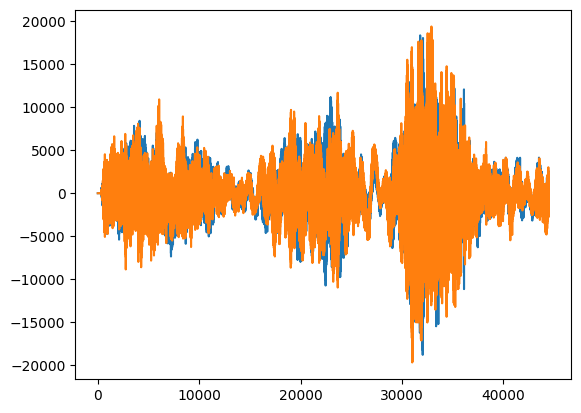

In [37]:
import matplotlib.pyplot as plt
plt.plot(wave_audio)

In [38]:
#### Extracting MFCC's For every audio file

def features_extractor(file):
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [39]:
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
audio_dataset_path = first_part_path+'audio/'
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3553it [01:49, 37.47it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8321it [04:08, 54.25it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [04:08, 58.27it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [04:20, 33.55it/s]


In [41]:
metadata.head(2)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing


In [40]:
extracted_features_df= pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head(2)

,feature,class
0,"[-211.93698, 62.58121, -122.813156, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995583, 51.073326, ...",children_playing


In [42]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())


In [43]:
X.shape

(8732, 40)

In [44]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [45]:
### Label Encoder
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [46]:
labelencoder.classes_

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype='<U16')

In [47]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train)

[[-1.24484680e+02  1.03169846e+02 -1.33165455e+01 ...  4.72908735e+00
  -2.91925478e+00  4.36318588e+00]
 [-5.13921928e+00  7.90478210e+01  4.16248989e+00 ... -3.44017529e+00
  -5.19278288e+00 -1.54999769e+00]
 [-4.03939590e+01 -1.31092958e+01 -7.20987606e+00 ...  1.99475348e+00
  -8.70601475e-01  2.89561892e+00]
 ...
 [-4.26655701e+02  9.15513382e+01  4.19170284e+00 ...  9.74399447e-01
   5.15445232e-01  9.15374696e-01]
 [-1.37251968e+02  1.24268539e+02 -2.15997734e+01 ...  1.25008607e+00
  -1.89575112e+00 -9.01497364e-01]
 [-4.18389374e+02  2.06862305e+02  7.23461866e+00 ... -3.98612142e+00
  -4.71784592e+00 -2.78925627e-01]]


In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6985, 40), (1747, 40), (6985, 10), (1747, 10))

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.optimizers import Adam
from sklearn import metrics

In [50]:
num_labels=y.shape[1]
num_labels

10

In [51]:
model=Sequential()

###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [53]:
## Trianing my model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras',
                               verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=(X_test, y_test), callbacks=[checkpointer,earlystop], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1120 - loss: 21.6725
Epoch 1: val_loss improved from inf to 2.29230, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1120 - loss: 21.5209 - val_accuracy: 0.1076 - val_loss: 2.2923
Epoch 2/100
203/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1250 - loss: 2.6548
Epoch 2: val_loss improved from 2.29230 to 2.28148, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1251 - loss: 2.6451 - val_accuracy: 0.1082 - val_loss: 2.2815
Epoch 3/100
208/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1211 - loss: 2.3511
Epoch 3: val_loss improved from 2.28148 to 2.27461, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1214 - loss: 2.3505 - val_accuracy: 0.1088 - val_loss: 2.2746
Epoch 4/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [54]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7538637518882751


In [56]:
filename =  '/root/sound_datasets/urbansound8k/audio/fold2/4201-3-3-0.wav'

In [60]:
audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Make predictions using the loaded model
predictions = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predictions)

# Map the predicted label index to the actual class label
class_names = ['Air Conditioner', 'Car Horn', 'Children Playing', 'Dog Bark',
               'Drilling', 'Engine Idling', 'Gun Shot', 'Jackhammer', 'Siren',
               'Street Music']
prediction_class = class_names[predicted_label]

print(prediction_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Dog Bark


In [58]:
ipd.Audio(filename)

In [62]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [64]:
ls '/root/sound_datasets/urbansound8k/audio/'

fold1/  fold10/  fold2/  fold3/  fold4/  fold5/  fold6/  fold7/  fold8/  fold9/


In [65]:
%%writefile app.py

import streamlit as st
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
import time
import os
import librosa

# Title of the app
st.title('Audio Classification system')

pmodel = load_model('/content/saved_models/audio_classification.keras')

uploaded_file=st.file_uploader("Choose an Audio file",
                               type=[".wav",".mp3"],
                               accept_multiple_files=False) #"wave",".flac",

#Saving the browsed audio in our local
def Save_audio(upload_audio):
    try:
        if not os.path.exists("uploads"):
            os.makedirs("uploads")
        save_path = os.path.join(os.getcwd(), "uploads", upload_audio.name)
        with open(save_path, 'wb') as f:
            f.write(upload_audio.getbuffer())
        return save_path
    except Exception as e:
        print("Error saving file:", e)
        return None

#extract features using librosa(mfcc)
def extract_feature(file):
    data, sample_rates=librosa.load(file)
    mfcc_features=librosa.feature.mfcc(y=data,sr=sample_rates,n_mfcc=40)
    mfcc_scaled_feature=np.mean(mfcc_features.T,axis=0)

    mfcc_scaled_feature = mfcc_scaled_feature.reshape(1, -1)
    print(000,type(mfcc_scaled_feature),mfcc_scaled_feature)
    return mfcc_scaled_feature


# Add a submit button
if st.button('Submit'):

  extract_features=[]
  if uploaded_file is not None:
      if Save_audio(uploaded_file):
          audio_bytes = uploaded_file.read()
          st.audio(audio_bytes, format="audio/wav")
          # extract_features.append(extract_feature(os.path.join("uploads",uploaded_file.name)))
          extract_features = extract_feature(os.path.join("uploads",uploaded_file.name))
          print(111,extract_features)
          progress_text = "Hold on! Result will shown below."
          my_bar = st.progress(0, text=progress_text)
          for percent_complete in range(100):
              time.sleep(0.02)
              my_bar.progress(percent_complete + 1, text=progress_text) ## to add progress bar untill feature got extracted

          predictions = pmodel.predict(extract_features)
          pred_class = np.argmax(predictions)

          # Map the predicted label index to the actual class label
          class_names = ['Air Conditioner', 'Car Horn', 'Children Playing', 'Dog Bark',
                        'Drilling', 'Engine Idling', 'Gun Shot', 'Jackhammer', 'Siren',
                        'Street Music']
          prediction_class = class_names[pred_class]

          print(prediction_class)

          bold_text = f"<t>{prediction_class}</t>"
          st.write(f'<span style="font-size:20px;">This Uploaded sound clip is {bold_text}</span>', unsafe_allow_html=True)


Writing app.py


In [66]:
!wget -q -O - ipv4.icanhazip.com

35.189.169.135


In [70]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.189.169.135:8501

your url is: https://ripe-apes-serve.loca.lt
y
2025-04-27 06:55:03.710728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745736903.789235   32387 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745736903.815689   32387 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-27 06:55:11.235749: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
0 <class 'numpy.ndarray'>

In [68]:
from keras.layers import Conv1D, MaxPooling1D

# Reshape input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()

###first layer (CNN)
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

###second layer (CNN)
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from convolutional layers
model.add(Flatten())

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,470 (501.84 KB)

 Trainable params: 128,470 (501.84 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
import numpy as np
# ... rest of your code (training, evaluation, prediction)

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification_cnn.keras',
                               verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=(X_test, y_test), callbacks=[checkpointer, earlystop], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

Epoch 1/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2683 - loss: 2.3994
Epoch 1: val_loss improved from inf to 1.41751, saving model to saved_models/audio_classification_cnn.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2705 - loss: 2.3862 - val_accuracy: 0.5289 - val_loss: 1.4175
Epoch 2/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4543 - loss: 1.5433
Epoch 2: val_loss improved from 1.41751 to 1.07569, saving model to saved_models/audio_classification_cnn.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4547 - loss: 1.5424 - val_accuracy: 0.6566 - val_loss: 1.0757
Epoch 3/100
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5840 - loss: 1.2110
Epoch 3: val_loss improved from 1.07569 to 0.90124, saving model to saved_models/audio_classification_cnn.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5843 - loss: 1.2100 - val_accuracy: 0.7069 - val_loss: 0.9012
Epoch 4/100
212/219 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

In [72]:
from google.colab import files
import os

# Navigate to the directory you want to download
os.chdir('/root/sound_datasets/urbansound8k/')

# Zip the directory contents
!zip -r urbansound8k.zip *

# Download the zip file
#files.download('urbansound8k.zip')
#folder.download('/root/sound_datasets/urbansound8k/')

Streaming output truncated to the last 5000 lines.
  adding: audio/fold9/145683-6-2-0.wav (deflated 3%)
  adding: audio/fold9/72265-3-4-0.wav (deflated 14%)
  adding: audio/fold9/152570-9-1-81.wav (deflated 7%)
  adding: audio/fold9/39856-5-0-11.wav (deflated 9%)
  adding: audio/fold9/180937-4-0-14.wav (deflated 43%)
  adding: audio/fold9/165567-3-3-0.wav (deflated 8%)
  adding: audio/fold9/50223-3-0-1.wav (deflated 33%)
  adding: audio/fold9/207211-2-0-72.wav (deflated 10%)
  adding: audio/fold9/196066-2-0-0.wav (deflated 11%)
  adding: audio/fold9/75743-0-0-9.wav (deflated 18%)
  adding: audio/fold9/13579-2-0-48.wav (deflated 23%)
  adding: audio/fold9/159745-8-1-4.wav (deflated 23%)
  adding: audio/fold9/79584-3-0-4.wav (deflated 9%)
  adding: audio/fold9/58937-4-0-13.wav (deflated 8%)
  adding: audio/fold9/7975-3-0-0.wav (deflated 10%)
  adding: audio/fold9/116483-3-1-2.wav (deflated 31%)
  adding: audio/fold9/149929-9-0-5.wav (deflated 19%)
  adding: audio/fold9/184449-2-0-12.wav 

NameError: name 'folder' is not defined

In [73]:
files.download('urbansound8k.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
!ls -l '/root/sound_datasets/urbansound8k/'

total 17648516
drwx--x--x 12 1829600028 1829600028        4096 May 19  2014 audio
-rw-------  1 1829600028 1829600028       26155 May 19  2014 FREESOUNDCREDITS.txt
drwx--x--x  2 1829600028 1829600028        4096 May 28  2014 metadata
-rwx--x--x  1 1829600028 1829600028        4932 Jun  3  2014 UrbanSound8K_README.txt
-rw-r--r--  1 root       root        6023741708 Apr 27 05:05 UrbanSound8K.tar.gz
-rw-r--r--  1 root       root       12048280207 Apr 27 07:19 urbansound8k.zip


In [76]:
files.download('/root/sound_datasets/urbansound8k/UrbanSound8K.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>